In [ ]:
#use hybrid models like SVM and Bayesian Belief Networks to classify the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,recall_score,precision_score,roc_auc_score,confusion_matrix,f1_score

from sklearn.svm import SVC
#import bbn
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController




In [ ]:
df = pd.read_csv("data/processeddata.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,1,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,1,1,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,1,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,1,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
def plot_confusion_matrix(ypreds,y):
    cm = confusion_matrix(y, ypreds)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y, ypreds))
    plt.title(all_sample_title, size = 15)

In [ ]:
#make the data size smaller using sampling in a another dataframe

df1 = df.sample(frac=0.1, replace=True, random_state=1)
print(df1.shape, df.shape)

(10983, 112) (109828, 112)


In [ ]:
target = "RainTomorrow"
features = [x for x in df.columns if x != target]
X = df1[features]
y = df1[target]

In [ ]:
y.value_counts()/len(y)

0    0.842666
1    0.157334
Name: RainTomorrow, dtype: float64

In [ ]:
#undersample the data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

y_resampled.value_counts()/len(y_resampled)

0    0.5
1    0.5
Name: RainTomorrow, dtype: float64

In [ ]:
y_resampled.shape

(3456,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy score:  0.8757396449704142
R2 score:  0.016665409724795133
Recall score:  0.3343558282208589
Precision score:  0.6606060606060606
Recall score:  0.3343558282208589
Precision score:  0.6606060606060606
ROC AUC score:  0.6522126548907609
F1 score:  0.4439918533604888
Specificity:  0.9700694815606627
Confusion Matrix: 
Confusion Matrix: 


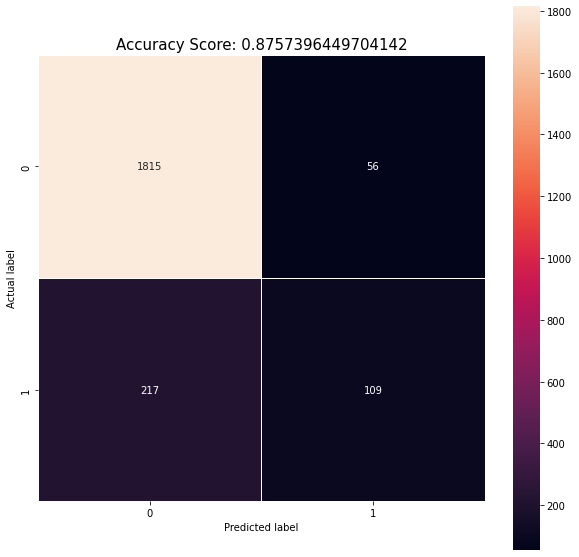

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=0, probability=False)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('ROC AUC score: ',roc_auc_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Specificity: ",cm[0,0]/(cm[0,0]+cm[0,1]))
print("Confusion Matrix: ")
# plot_confustion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
plot_confusion_matrix(y_pred, y_test)


In [ ]:
#import gridsearchcv
from sklearn.model_selection import GridSearchCV

params = {"C":[0.01,0.1,1,10]}

grid = GridSearchCV(svm, param_grid=params, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
y_pred = grid.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Specificity",cm[0,0]/(cm[0,0]+cm[0,1]))
print("AUC",roc_auc_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))

Best cross-validation score: 0.86
Best parameters:  {'C': 0.1}
Accuracy score:  0.8766499772416932
R2 score:  0.023869326137067715
Recall score:  0.24539877300613497
Precision score:  0.7619047619047619
Specificity 0.9866381614110101
AUC 0.6160184672085726
F1 score:  0.3712296983758701


In [ ]:
df=pd.read_csv('data/weatherAUS.csv', encoding='utf-8')
df=df[pd.isnull(df['RainTomorrow'])==False]
df=df.fillna(df.mean())

# Create bands for variables that we want to use in the model
df['WindGustSpeedCat']=df['WindGustSpeed'].apply(lambda x: '0.<=40'   if x<=40 else
                                                            '1.40-50' if 40<x<=50 else '2.>50')
df['Humidity9amCat']=df['Humidity9am'].apply(lambda x: '1.>60' if x>60 else '0.<=60')
df['Humidity3pmCat']=df['Humidity3pm'].apply(lambda x: '1.>60' if x>60 else '0.<=60')

# Show a snaphsot of data
df.head()

<ipython-input-11-5ad5f0769f6a>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustSpeedCat,Humidity9amCat,Humidity3pmCat
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,1007.1,8.000000,4.503167,16.9,21.8,No,No,1.40-50,1.>60,0.<=60
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,1007.8,4.437189,4.503167,17.2,24.3,No,No,1.40-50,0.<=60,0.<=60
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,1008.7,4.437189,2.000000,21.0,23.2,No,No,1.40-50,0.<=60,0.<=60
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,1012.8,4.437189,4.503167,18.1,26.5,No,No,0.<=40,0.<=60,0.<=60
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,1.40-50,1.>60,0.<=60


In [ ]:
print(df["Humidity9amCat"].value_counts()/len(df))
for i in df["Humidity9amCat"].unique():
    print(df[df["Humidity9amCat"]==i]["Humidity3pmCat"].value_counts()/len(df[df["Humidity9amCat"]==i]))

for i in df["Humidity9amCat"].unique():
    for j in df["Humidity3pmCat"].unique():
        print(i,j,df[(df["Humidity9amCat"]==i) & (df["Humidity3pmCat"]==j)]["RainTomorrow"].value_counts()/len(df[(df["Humidity9amCat"]==i) & (df["Humidity3pmCat"]==j)]))


1.>60     0.693417
0.<=60    0.306583
Name: Humidity9amCat, dtype: float64
0.<=60    0.557602
1.>60     0.442398
Name: Humidity3pmCat, dtype: float64
0.<=60    0.92827
1.>60     0.07173
Name: Humidity3pmCat, dtype: float64
1.>60 0.<=60 No     0.864112
Yes    0.135888
Name: RainTomorrow, dtype: float64
1.>60 1.>60 No     0.540326
Yes    0.459674
Name: RainTomorrow, dtype: float64
0.<=60 0.<=60 No     0.92295
Yes    0.07705
Name: RainTomorrow, dtype: float64
0.<=60 1.>60 No     0.604413
Yes    0.395587
Name: RainTomorrow, dtype: float64


In [ ]:
# Create nodes by manually typing in probabilities
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), [0.30658, 0.69342])
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), [0.92827, 0.07173,
                                                    0.55760, 0.44240])
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), [0.58660, 0.24040, 0.17300])
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), [0.92314, 0.07686,
                                                0.89072, 0.10928,
                                                0.76008, 0.23992,
                                                0.64250, 0.35750,
                                                0.49168, 0.50832,
                                                0.32182, 0.67818])

In [ ]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob

In [ ]:
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), probs(df, child='Humidity9amCat'))
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), probs(df, child='Humidity3pmCat', parent1='Humidity9amCat'))
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), probs(df, child='WindGustSpeedCat'))
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Humidity3pmCat', parent2='WindGustSpeedCat'))

# Create Network
bbn = Bbn() \
    .add_node(H9am) \
    .add_node(H3pm) \
    .add_node(W) \
    .add_node(RT) \
    .add_edge(Edge(H9am, H3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(H3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W, RT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

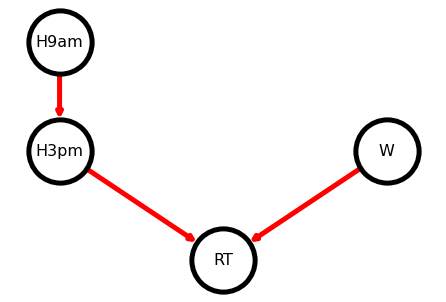

In [ ]:
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 0.5), 3: (0, -1)}
import networkx as nx # for drawing graphs
# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}

n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [ ]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')

# Use the above function to print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.67124
1=>60|0.32876
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.30658
0=>60|0.69342
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.77655
3=Yes|0.22345
----------------


In [ ]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)

# Use above function to add evidence
evidence('ev1', 'H9am', '>60', 1.0)

# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.55760
1=>60|0.44240
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.73833
3=Yes|0.26167
----------------


In [ ]:
evidence('ev1', 'H3pm', '>60', 1.0)
evidence('ev2', 'W', '>50', 1.0)
# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.00000
1=>60|1.00000
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.00000
2=40-50|0.00000
2=>50|1.00000
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.32182
3=Yes|0.67818
----------------


In [ ]:
df_test = df[['Humidity9amCat', 'Humidity3pmCat', 'WindGustSpeedCat','RainTomorrow']].sample(1000, random_state=42)
x_test = df_test[['Humidity9amCat', 'Humidity3pmCat', 'WindGustSpeedCat']]
y_test = df_test['RainTomorrow']

In [ ]:
#create a function that takes x_test and returns predicted values of RT node (RainTomorrow), if probability of Yes is greater than 0.5, then predict Yes, otherwise predict No

def predict(x_test):
    y_pred=[]
    for i in range(len(x_test)):
        evidence('ev1', 'H9am', x_test['Humidity9amCat'].iloc[i][2:], 1.0)
        evidence('ev2', 'H3pm', x_test['Humidity3pmCat'].iloc[i][2:], 1.0)
        evidence('ev3', 'W', x_test['WindGustSpeedCat'].iloc[i][2:], 1.0)
        potential = join_tree.get_bbn_potential(join_tree.get_bbn_node_by_name('RT'))
        potstring = str(potential)
        potstring = potstring.split('\n')
        no = float(potstring[0].split('|')[-1])
        yes = float(potstring[1].split('|')[-1])
        if yes>no:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

# Use the above function to predict values for x_test
y_pred=predict(x_test)


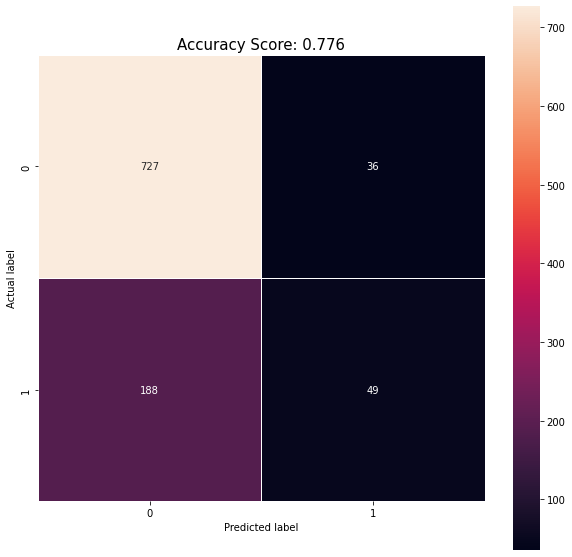

In [ ]:
# Print the confusion matrix
y_test = y_test.replace({'No': 0, 'Yes': 1})
plot_confusion_matrix(y_pred,y_test)

Accuracy matrix of 1000 samples